# **About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# **Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# **Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:


Product Purchased:	KP281, KP481, or KP781
Age:	In years
Gender:	Male/Female
Education:	In years
MaritalStatus:	Single or partnered
Usage:	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in $)
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles:	The average number of miles the customer expects to walk/run each week

# **Product Portfolio:**

The KP281 is an entry-level treadmill that sells for $1,500.
   
The KP481 is for mid-level runners that sell for $1,750.
  
The KP781 treadmill is having advanced features that sell for $2,500.

In [ ]:
!gdown 1SVIOq3ce9KoIhX34ns86r3qpWnTClA7N -O 'aerofit.csv'

Downloading...
From: https://drive.google.com/uc?id=1SVIOq3ce9KoIhX34ns86r3qpWnTClA7N
To: /content/aerofit.csv
100% 7.28k/7.28k [00:00<00:00, 20.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('aerofit.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.info() # No nulls detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


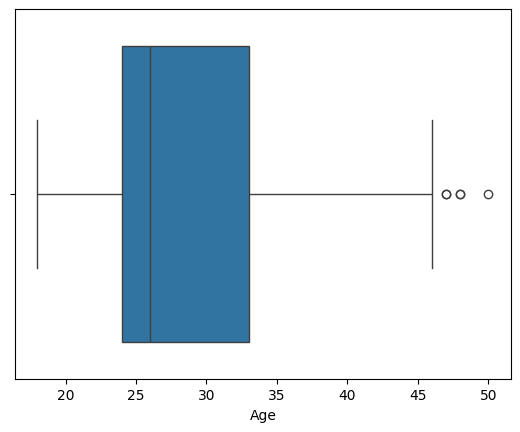

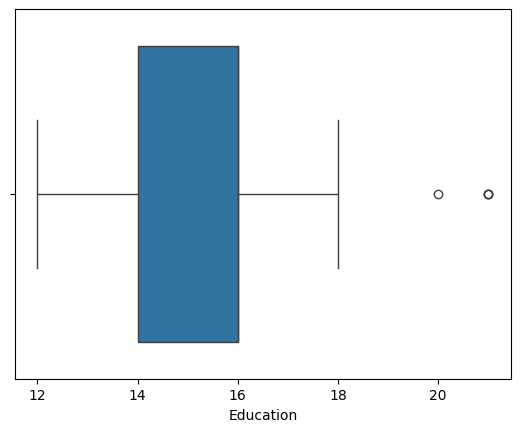

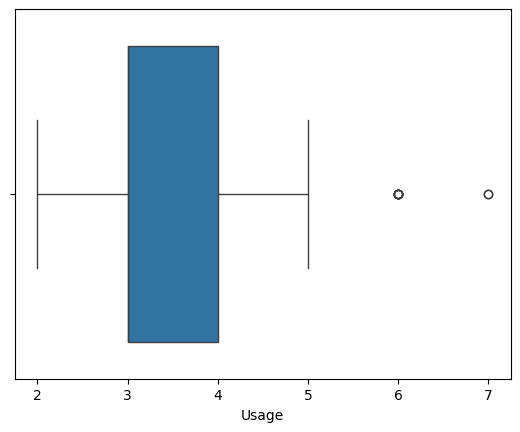

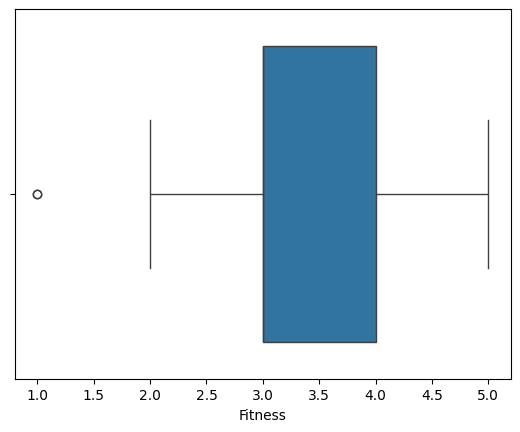

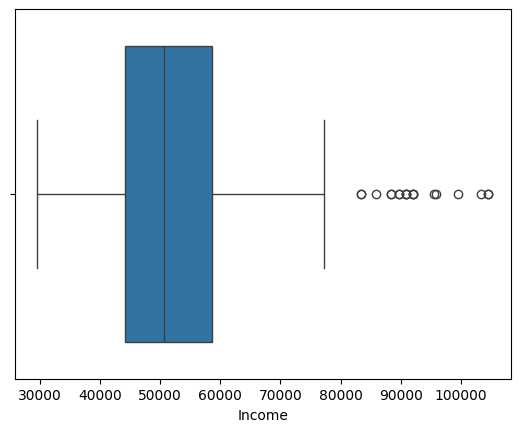

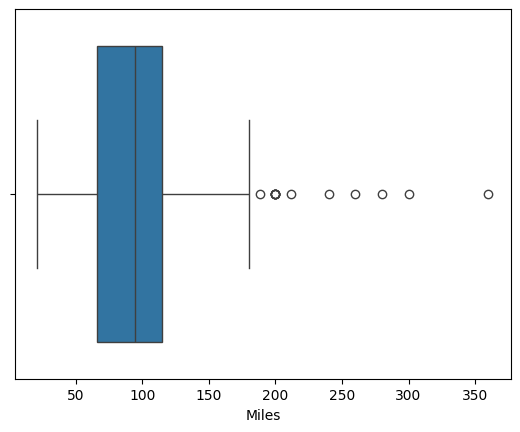

In [ ]:
for col in df.select_dtypes(include='number').columns:
  sns.boxplot(x=df[col])
  plt.show()

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# **Check if features like marital status, Gender, and age have any effect on the product purchased**

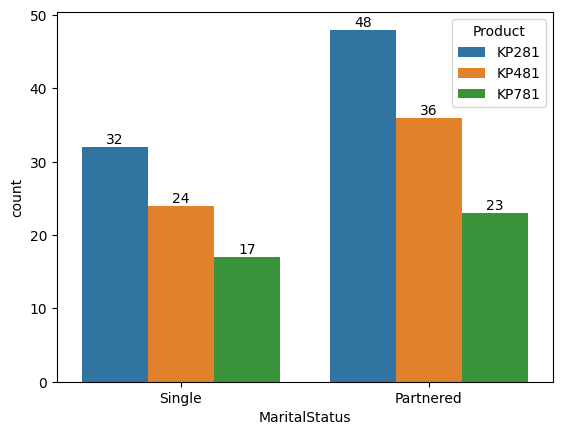

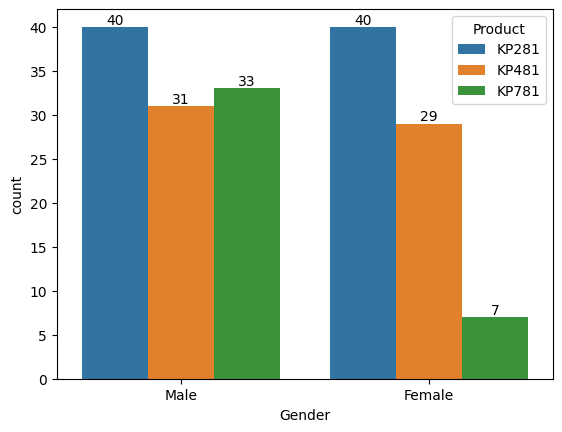

In [ ]:
category_cols = ['MaritalStatus','Gender']
for col in category_cols:
  ax=sns.countplot(x=col,hue='Product',data=df)
  for container in ax.containers:
    ax.bar_label(container)
  plt.show()

In [ ]:
df2 = df.groupby(['MaritalStatus','Gender','Product'])['Product'].agg(['count']).unstack()
df2


count            
Product              KP281 KP481 KP781
MaritalStatus Gender                  
Partnered     Female    27    15     4
              Male      21    21    19
Single        Female    13    14     3
              Male      19    10    14

In [ ]:
#KP781 is least preferred by both single and married females. Also, in general males tend to purchase more aerofit products compared to females

In [ ]:
percentage = df.groupby(['MaritalStatus', 'Gender'])['Product'].value_counts(normalize=True).unstack() * 100
percentage

Product                   KP281      KP481      KP781
MaritalStatus Gender                                 
Partnered     Female  58.695652  32.608696   8.695652
              Male    34.426230  34.426230  31.147541
Single        Female  43.333333  46.666667  10.000000
              Male    44.186047  23.255814  32.558140

In [ ]:
df['Age'].nunique()

32

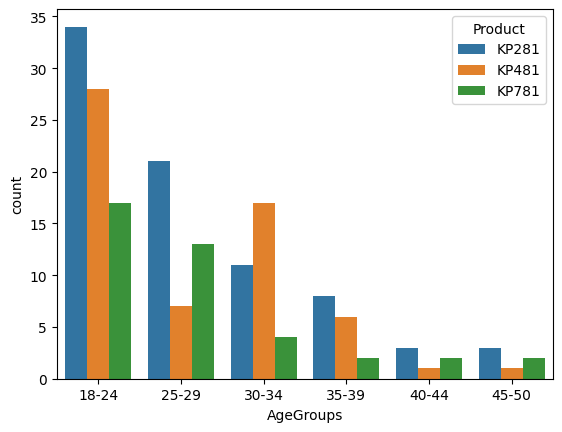

In [ ]:
bins = [17,25,30,35,40,45,50]
labels = ['18-24','25-29','30-34','35-39','40-44','45-50']
df['AgeGroups']=pd.cut(df['Age'],bins=bins,labels=labels)
sns.countplot(x='AgeGroups', hue='Product', data=df)
plt.show()

In [ ]:
# People upto age 40 tend to focus more on fitness and prefer buying aerofit products.

# **Find if there is any relationship between the continuous variables and the output variable in the data.**

<Axes: xlabel='Product', ylabel='Income'>

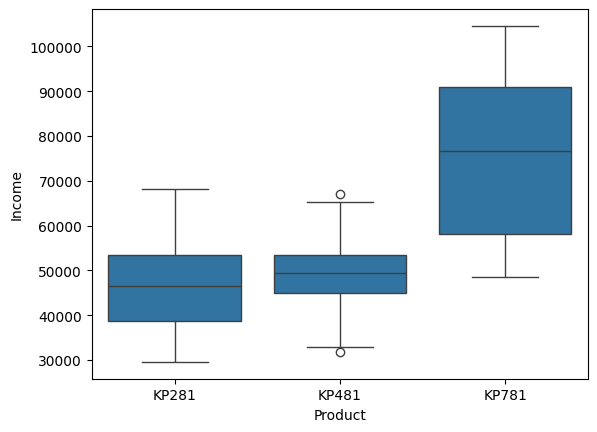

In [ ]:
sns.boxplot(y='Income',x='Product',data=df)

In [ ]:
#This shows people with higher income(between 60 to 90k) prefer kp781, while lesser income prefer kp281 and kp481

<Axes: xlabel='Product', ylabel='Miles'>

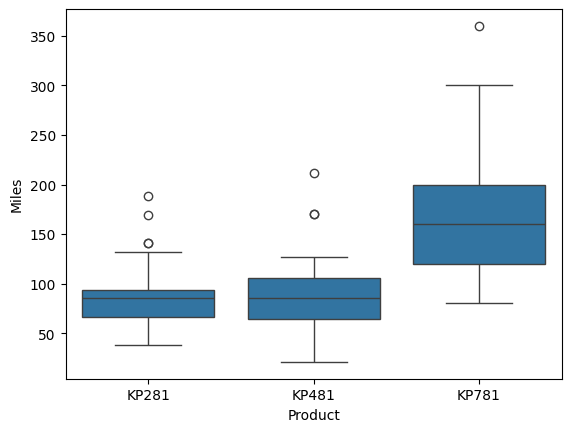

In [ ]:
sns.boxplot(x='Product',y='Miles',data=df)

In [ ]:
# This suggest KP781 purchasing people are more fitness focused as they cover more miles per week

# **○ Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)**

In [ ]:
df3 = df['Product'].value_counts().reset_index()
df3

,Product,count
0,KP281,80
1,KP481,60
2,KP781,40


In [ ]:
df3['marginal'] = df3['count']/df3['count'].sum()
df3

,Product,count,marginal
0,KP281,80,0.444444
1,KP481,60,0.333333
2,KP781,40,0.222222


In [ ]:
columns_to_analyze = ['Gender', 'AgeGroups', 'MaritalStatus']

for col in columns_to_analyze:
    marginal_prob = pd.crosstab(df[col], columns=df['Product'], normalize=True) * 100  # Normalize over entire dataset
    print(f"\nMarginal probability distribution for {col}:")
    print(marginal_prob)



Marginal probability distribution for Gender:
Product      KP281      KP481      KP781
Gender                                  
Female   22.222222  16.111111   3.888889
Male     22.222222  17.222222  18.333333

Marginal probability distribution for AgeGroups:
Product        KP281      KP481     KP781
AgeGroups                                
18-24      18.888889  15.555556  9.444444
25-29      11.666667   3.888889  7.222222
30-34       6.111111   9.444444  2.222222
35-39       4.444444   3.333333  1.111111
40-44       1.666667   0.555556  1.111111
45-50       1.666667   0.555556  1.111111

Marginal probability distribution for MaritalStatus:
Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      26.666667  20.000000  12.777778
Single         17.777778  13.333333   9.444444


In [ ]:
columns_to_analyze = ['Gender', 'AgeGroups', 'MaritalStatus']

for col in columns_to_analyze:
    crosstab = pd.crosstab(df[col], df['Product'], normalize=0)*100  # Normalize over rows
    print(f"\nConditional Probability of purchasing each product based on {col}:")
    print(crosstab)


Conditional Probability of purchasing each product based on Gender:
Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769

Conditional Probability of purchasing each product based on AgeGroups:
Product        KP281      KP481      KP781
AgeGroups                                 
18-24      43.037975  35.443038  21.518987
25-29      51.219512  17.073171  31.707317
30-34      34.375000  53.125000  12.500000
35-39      50.000000  37.500000  12.500000
40-44      50.000000  16.666667  33.333333
45-50      50.000000  16.666667  33.333333

Conditional Probability of purchasing each product based on MaritalStatus:
Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      44.859813  33.644860  21.495327
Single         43.835616  32.876712  23.287671


# **○ Find the correlation between the given features in the table.**

<Axes: >

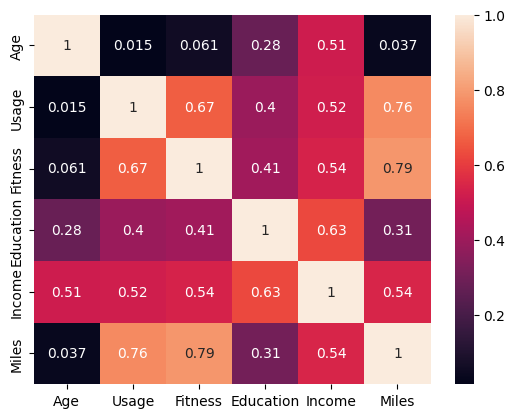

In [ ]:
data = ['Age','Usage','Fitness','Education','Income','Miles']
data2 = df[data].corr()
sns.heatmap(data2,annot=True)

In [ ]:
# more educated people have higher income
# the more the number of miles, the more fit the person is

# **6. Customer profiling and recommendations for KP281**

In [ ]:
df_kp281 = df.loc[df['Product']=='KP281']
df_kp281

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroups
0,KP281,18,Male,14,Single,3,4,29562,112,18-24
1,KP281,19,Male,15,Single,2,3,31836,75,18-24
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-24
3,KP281,19,Male,12,Single,3,3,32973,85,18-24
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-24
...,...,...,...,...,...,...,...,...,...,...
75,KP281,43,Male,16,Partnered,3,3,53439,66,40-44
76,KP281,44,Female,16,Single,3,4,57987,75,40-44
77,KP281,46,Female,16,Partnered,3,2,60261,47,45-50
78,KP281,47,Male,16,Partnered,4,3,56850,94,45-50


In [ ]:
df_kp281.groupby(['Gender','AgeGroups'])['Product'].value_counts()

<ipython-input-101-fce7e3896865>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_kp281.groupby(['Gender','AgeGroups'])['Product'].value_counts()


Gender  AgeGroups  Product
Female  18-24      KP281      17
        25-29      KP281      11
        30-34      KP281       7
        35-39      KP281       2
        40-44      KP281       1
        45-50      KP281       2
Male    18-24      KP281      17
        25-29      KP281      10
        30-34      KP281       4
        35-39      KP281       6
        40-44      KP281       2
        45-50      KP281       1
Name: count, dtype: int64

In [ ]:
#very widely used by males, females upto 35 years of age

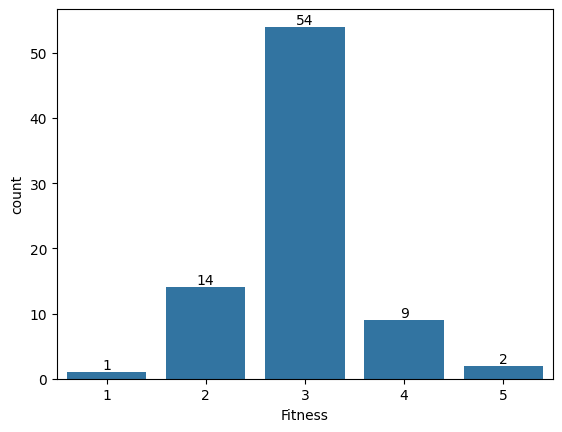

In [ ]:
ax=sns.countplot(x='Fitness',data=df_kp281)
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
# people using kp_281 have fitness score in range 2-4 with more users being medium fit.

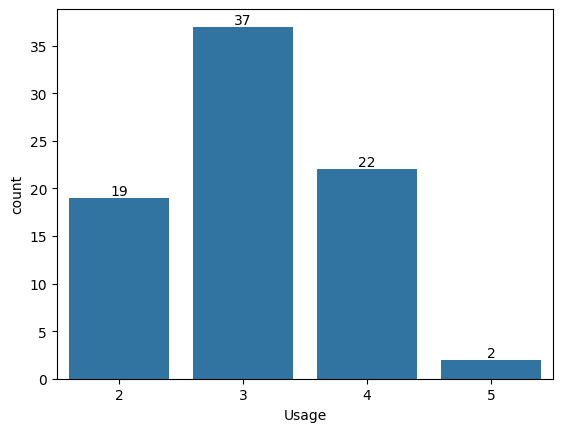

In [ ]:
ax=sns.countplot(x='Usage',data=df_kp281)
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
# users having kp281 tend to use in 2 to 4 times a week

In [ ]:
df_kp281['Income'].describe()

,Income
count,80.00000
mean,46418.02500
std,9075.78319
min,29562.00000
25%,38658.00000
50%,46617.00000
75%,53439.00000
max,68220.00000


<Axes: xlabel='Income', ylabel='Count'>

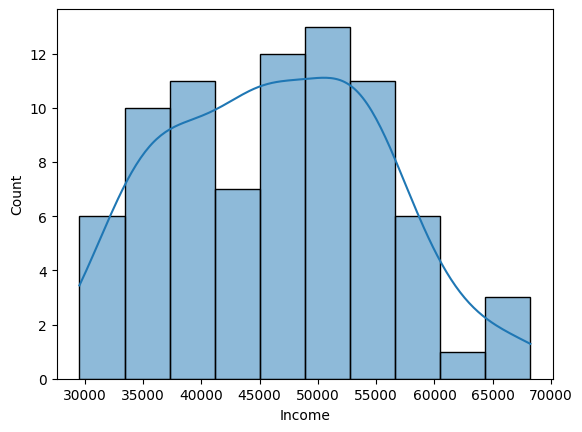

In [ ]:
sns.histplot(df_kp281['Income'],bins=10,kde=True)

In [ ]:
# entry level choice of treadmill for users with income range 30k - 69k

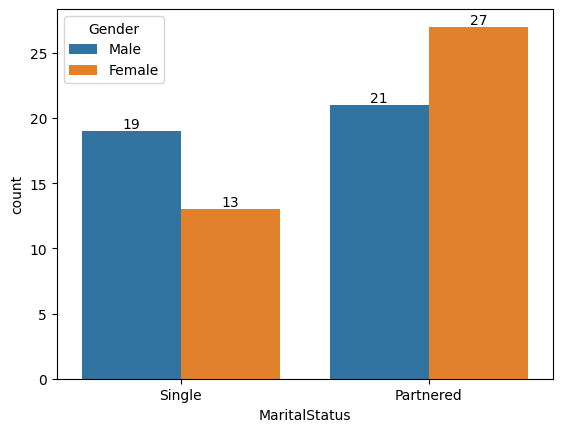

In [ ]:
ax=sns.countplot(x='MaritalStatus',hue='Gender',data=df_kp281)
for i in ax.containers:
  ax.bar_label(i)

<Axes: xlabel='Miles', ylabel='Count'>

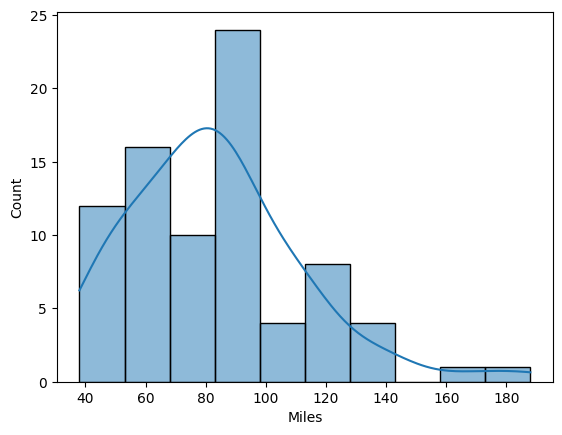

In [ ]:
sns.histplot(df_kp281['Miles'],bins=10,kde=True)

In [ ]:
df_kp281['Miles'].describe()

,Miles
count,80.000000
mean,82.787500
std,28.874102
min,38.000000
25%,66.000000
50%,85.000000
75%,94.000000
max,188.000000


In [ ]:
# Most frequent miles covered 60-100 miles

# **Customer Profiling and Recommendations for KP481**

In [ ]:
df_kp481 = df.loc[df['Product']=='KP481']
df_kp481.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroups
80,KP481,19,Male,14,Single,3,3,31836,64,18-24
81,KP481,20,Male,14,Single,2,3,32973,53,18-24
82,KP481,20,Female,14,Partnered,3,3,34110,106,18-24
83,KP481,20,Male,14,Single,3,3,38658,95,18-24
84,KP481,21,Female,14,Partnered,5,4,34110,212,18-24


In [ ]:
df_kp481.groupby(['Gender','AgeGroups'])['Product'].value_counts()

<ipython-input-115-ba5cbde8daa8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_kp481.groupby(['Gender','AgeGroups'])['Product'].value_counts()


Gender  AgeGroups  Product
Female  18-24      KP481      12
        25-29      KP481       5
        30-34      KP481       8
        35-39      KP481       4
        40-44      KP481       0
        45-50      KP481       0
Male    18-24      KP481      16
        25-29      KP481       2
        30-34      KP481       9
        35-39      KP481       2
        40-44      KP481       1
        45-50      KP481       1
Name: count, dtype: int64

In [ ]:
# Used by males, females upto age 40 years

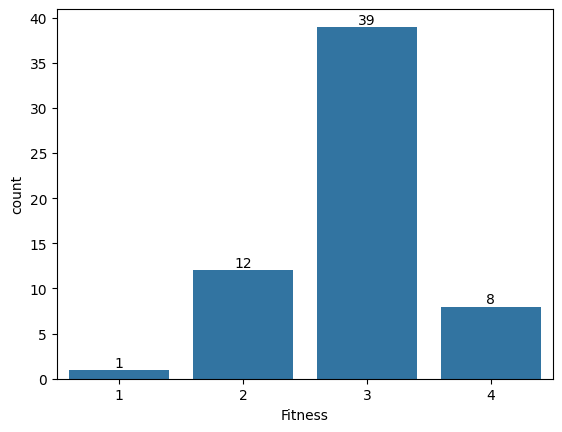

In [ ]:
ax=sns.countplot(x='Fitness',data=df_kp481)
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
# people using kp481 have a fitness of scale 2-4 ,ie, medium fit

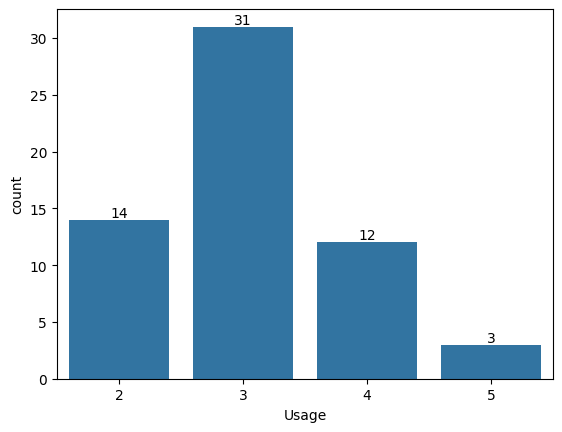

In [ ]:
ax=sns.countplot(x='Usage',data=df_kp481)
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
# People having KP481 tend to use it  2 - 4 times a week

In [ ]:
df_kp481['Income'].describe()

,Income
count,60.000000
mean,48973.650000
std,8653.989388
min,31836.000000
25%,44911.500000
50%,49459.500000
75%,53439.000000
max,67083.000000


<Axes: xlabel='Income', ylabel='Count'>

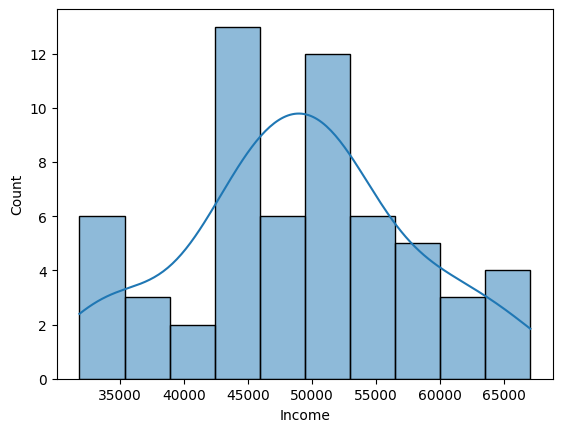

In [ ]:
sns.histplot(df_kp481['Income'],bins=10,kde=True)

In [ ]:
# purchased by people in the income range 35k - 65k

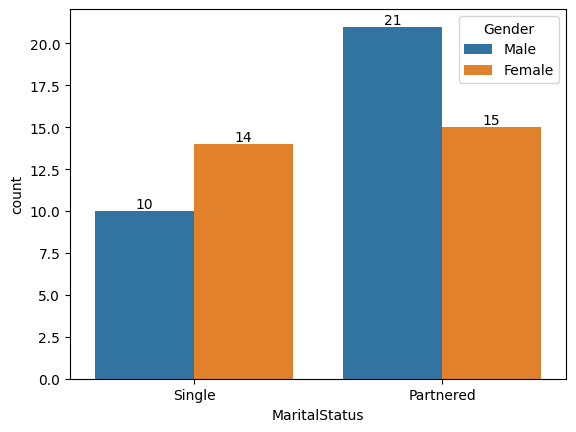

In [ ]:
ax=sns.countplot(x='MaritalStatus',hue='Gender',data=df_kp481)
for i in ax.containers:
  ax.bar_label(i)

<Axes: xlabel='Miles', ylabel='Count'>

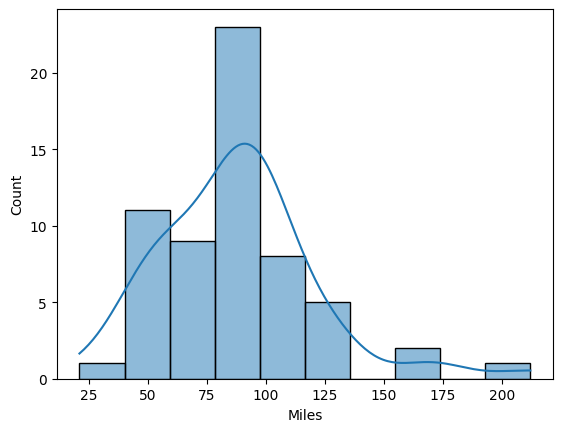

In [ ]:
sns.histplot(df_kp481['Miles'],bins=10,kde=True)

In [ ]:
df_kp481['Miles'].describe()

,Miles
count,60.000000
mean,87.933333
std,33.263135
min,21.000000
25%,64.000000
50%,85.000000
75%,106.000000
max,212.000000


# ** Customer Profiling and Recommendations for KP781**

In [ ]:
df_kp781 = df.loc[df['Product']=='KP781']
df_kp781.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroups
140,KP781,22,Male,14,Single,4,3,48658,106,18-24
141,KP781,22,Male,16,Single,3,5,54781,120,18-24
142,KP781,22,Male,18,Single,4,5,48556,200,18-24
143,KP781,23,Male,16,Single,4,5,58516,140,18-24
144,KP781,23,Female,18,Single,5,4,53536,100,18-24


In [ ]:
df_kp781.groupby(['Gender','AgeGroups'])['Product'].value_counts()

<ipython-input-128-83e3bbb73146>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_kp781.groupby(['Gender','AgeGroups'])['Product'].value_counts()


Gender  AgeGroups  Product
Female  18-24      KP781       3
        25-29      KP781       3
        30-34      KP781       1
        35-39      KP781       0
        40-44      KP781       0
        45-50      KP781       0
Male    18-24      KP781      14
        25-29      KP781      10
        30-34      KP781       3
        35-39      KP781       2
        40-44      KP781       2
        45-50      KP781       2
Name: count, dtype: int64

In [ ]:
# mostly used by males upto 30 years old

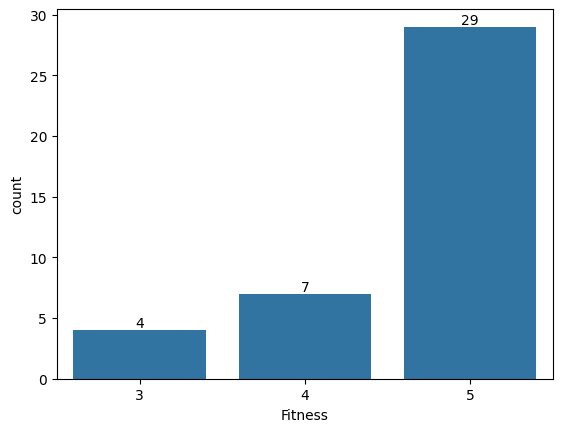

In [ ]:
ax=sns.countplot(x='Fitness',data=df_kp781)
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
# used by person who have almost best physique

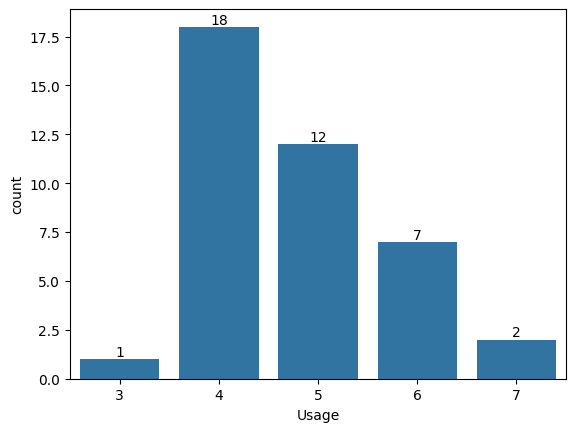

In [ ]:
ax=sns.countplot(x='Usage',data=df_kp781)
for i in ax.containers:
  ax.bar_label(i)

In [ ]:
# on an average kp781 is used 4-7 times a week ,i.e., people who take fitness seriously

In [ ]:
df_kp781['Income'].describe()

,Income
count,40.00000
mean,75441.57500
std,18505.83672
min,48556.00000
25%,58204.75000
50%,76568.50000
75%,90886.00000
max,104581.00000


<Axes: xlabel='Income', ylabel='Count'>

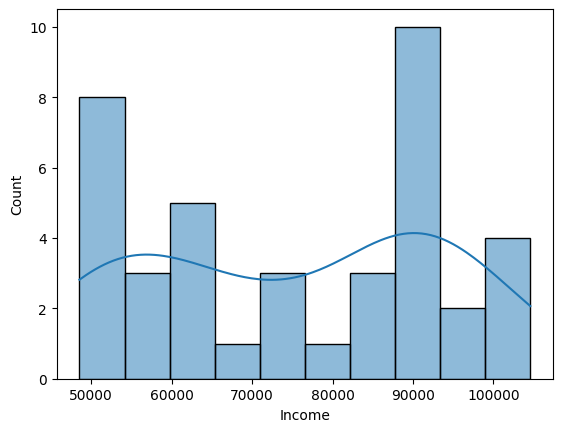

In [ ]:
sns.histplot(df_kp781['Income'],bins=10,kde=True)

In [ ]:
# used by elite class , people with salary in range 58k - 90k

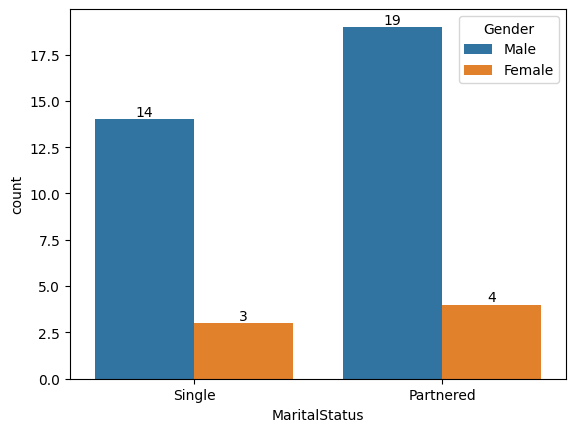

In [ ]:
ax=sns.countplot(x='MaritalStatus',hue='Gender',data=df_kp781)
for i in ax.containers:
  ax.bar_label(i)

<Axes: xlabel='Miles', ylabel='Count'>

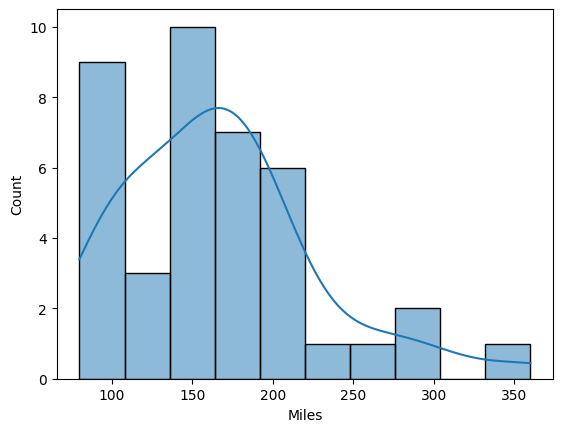

In [ ]:
sns.histplot(df_kp781['Miles'],bins=10,kde=True)

In [ ]:
df_kp781['Miles'].describe()

,Miles
count,40.000000
mean,166.900000
std,60.066544
min,80.000000
25%,120.000000
50%,160.000000
75%,200.000000
max,360.000000


In [ ]:
# Fitness freaks frequently cover 120 - 200 miles weekly

# **Customer Profiling**

**For KP281**
- Probability of buying 0.44
- Used by people of age 18 - 35 years
- Fitness Score of 2 - 4
- Used 2-4 times a week
- Income ranges between 40k - 54k
-  Weekly Miles Covered 66 - 94 miles

**For KP481**
- Probability of buying 0.33
- Used by people of age 18 - 40 years
- Fitness Score of 2 - 4
- Used 2-4 times a week
- Income ranges between 45k - 54k
-  Frequent Weekly Miles Covered 64 - 106 miles

**For KP781**
- Probability of buying 0.22
- Used by males of age 18 - 30 years
- Fitness Score of 4 - 5
- Used 4-7 times a week
- Income ranges between 58k - 90k
-  Frequent Weekly Miles Covered 120 - 200 miles

# **Recommendations**

- Promote the KP781 as the top choice for fitness enthusiasts and high-income individuals. Highlight its benefits for women seeking a better fit and healthier body.
- Since medium-income individuals prefer KP281 and KP781, introduce EMI options to make these models more accessible. This will allow more people to consider purchasing the KP781 without financial strain.
-Organize fitness events with a strong focus on female participation, allowing attendees to engage with and experience Aerofit products firsthand.
- Focus on targeting young to middle-aged customers exclusively.